In [19]:
import os
import cv2
import numpy as np
from tqdm import tqdm

#flag
REBUILD_DATA = True

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "data/PetImages/Cat"
    DOGS = "data/PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = [] #Populate this array
    catcount = 0 # to check balance of data
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS: #iterating over directories #labels also mean the path location here
            print(label)
            for f in tqdm(os.listdir(label)):
                try :
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # colour adds a channel\
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                    if label == self.CATS: 
                        self.catcount +=1
                    elif label == self.DOGS: self.dogcount +=1
                except Exception as e: #handle exception, given avoiding thumbs.db file accidentally
                    pass
                    #print(str(e))
        np.random.shuffle(self.training_data) #shuffle inplace
        np.save("training_data.npy", self.training_data)
        print("Cats:", self.catcount)
        print("Dogs:", self.dogcount)

        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()
            
        

  1%|          | 95/12501 [00:00<00:13, 942.80it/s]

data/PetImages/Cat


  1%|          | 80/12501 [00:00<00:15, 794.19it/s]

data/PetImages/Dog


100%|██████████| 12501/12501 [00:13<00:00, 945.65it/s]


Cats: 12476
Dogs: 12470


In [1]:
import numpy as np # for one hot encoding
np.eye(2)[0]

array([1., 0.])

In [2]:
np.eye(2)[1]

array([0., 1.])

In [4]:
train_data = np.load("training_data.npy", allow_pickle = True)

In [14]:
print((train_data[1]))

[array([[ 73,  73, 154, ...,  43,  30,  57],
       [ 73,  72, 153, ...,  43,  39,  52],
       [ 72,  73, 153, ...,  43,  44,  54],
       ...,
       [ 83,  89,  86, ...,  85,  80,  76],
       [ 86,  87,  85, ...,  90,  86,  88],
       [ 85,  90,  90, ...,  89,  84,  89]], dtype=uint8)
 array([1., 0.])]


In [16]:
import matplotlib.pyplot as plt 

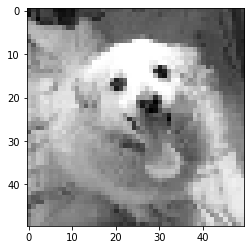

In [22]:
plt.imshow(train_data[0][0], cmap = "gray")
plt.show()